<a href="https://colab.research.google.com/github/OtiEdema/Data_Sc/blob/main/happysad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images and it will automatically label all the images


In [5]:
img = image.load_img('/content/drive/MyDrive/projectlive/training/happy/WIN_20240606_09_56_54_Pro.jpg')

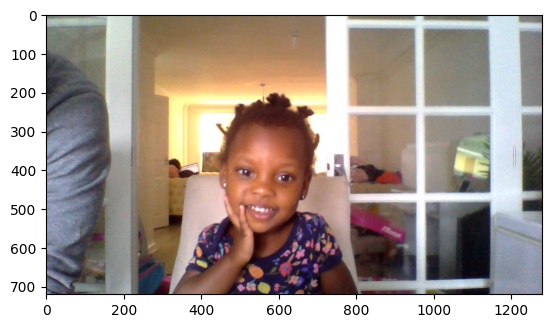

In [6]:
plt.imshow(img)

In [7]:
il = cv2.imread('/content/drive/MyDrive/projectlive/training/happy/WIN_20240606_09_56_54_Pro.jpg')
il
#3 dimension metrics are created for the image and the value range from 0 - 255



array([[[105, 126, 127],
        [101, 123, 121],
        [ 97, 120, 112],
        ...,
        [119, 113, 102],
        [120, 113,  98],
        [120, 113,  96]],

       [[104, 122, 121],
        [102, 121, 118],
        [100, 121, 112],
        ...,
        [115, 110, 101],
        [117, 111,  98],
        [116, 111,  96]],

       [[106, 120, 114],
        [106, 121, 113],
        [106, 123, 110],
        ...,
        [114, 110, 105],
        [116, 110, 103],
        [115, 110, 101]],

       ...,

       [[149, 148, 114],
        [149, 147, 113],
        [155, 145, 115],
        ...,
        [157, 139, 146],
        [153, 133, 145],
        [153, 133, 146]],

       [[145, 149, 108],
        [149, 147, 112],
        [156, 146, 116],
        ...,
        [156, 137, 146],
        [154, 131, 145],
        [152, 129, 144]],

       [[141, 145, 103],
        [149, 148, 110],
        [158, 148, 118],
        ...,
        [158, 139, 148],
        [157, 134, 148],
        [156, 133, 148]]

In [8]:
il.shape
#shape of your image height, weight, rgb

(720, 1280, 3)

In [9]:
train = ImageDataGenerator(rescale = 1/200)
validation = ImageDataGenerator(rescale = 1/200)



In [10]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/projectlive/training',
                                         target_size = (200,200),
                                         batch_size = 32,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/projectlive/validation',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 92 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [11]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [12]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [13]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [15]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 15,
                      validation_data = validation_dataset)

Epoch 1/15
3/3 [==============================] - 23s 5s/step - loss: 3.0792 - accuracy: 0.5543
Epoch 2/15
3/3 [==============================] - 5s 2s/step - loss: 0.6832 - accuracy: 0.6413
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6459 - accuracy: 0.6413
Epoch 4/15
3/3 [==============================] - 6s 2s/step - loss: 0.6454 - accuracy: 0.6739
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6517 - accuracy: 0.6957
Epoch 6/15
3/3 [==============================] - 6s 2s/step - loss: 0.5874 - accuracy: 0.7283
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5550 - accuracy: 0.7391
Epoch 8/15
3/3 [==============================] - 6s 2s/step - loss: 0.4928 - accuracy: 0.8261
Epoch 9/15
3/3 [==============================] - 5s 1s/step - loss: 0.6027 - accuracy: 0.6739
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.4452 - accuracy: 0.8696
Epoch 11/15
3/3 [==============================]

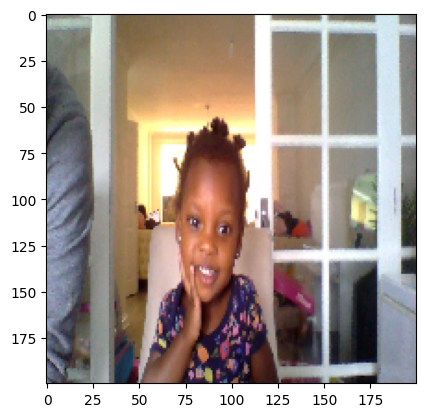

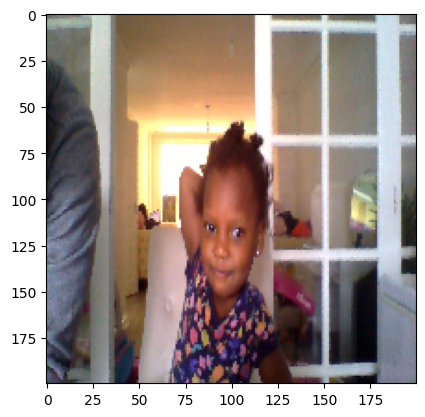

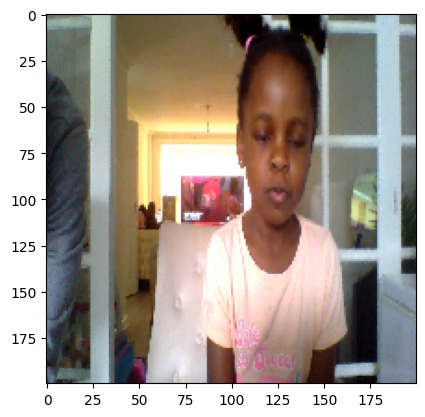

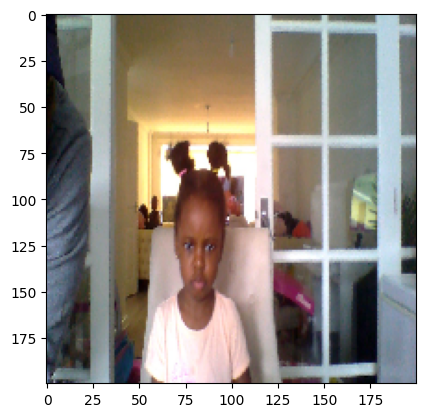

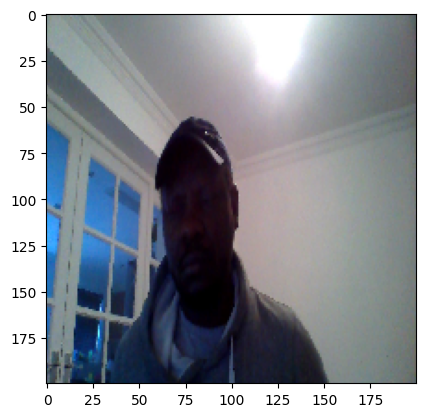

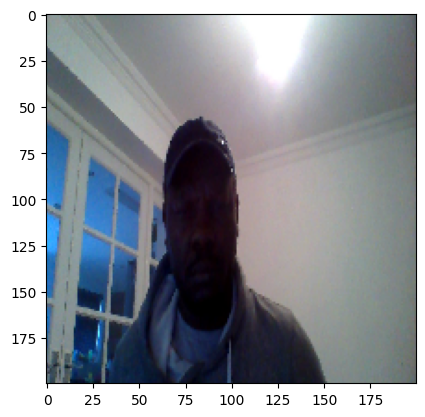

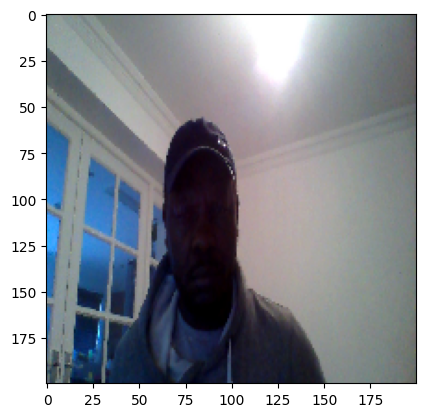

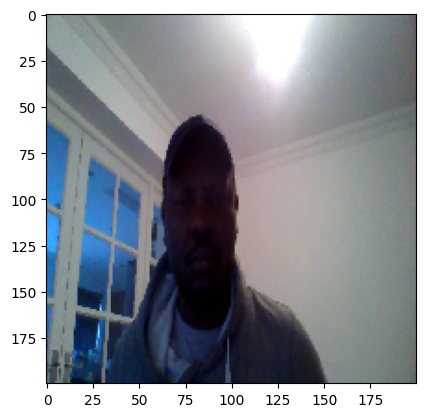

In [19]:
dir_path = '/content/drive/MyDrive/projectlive/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

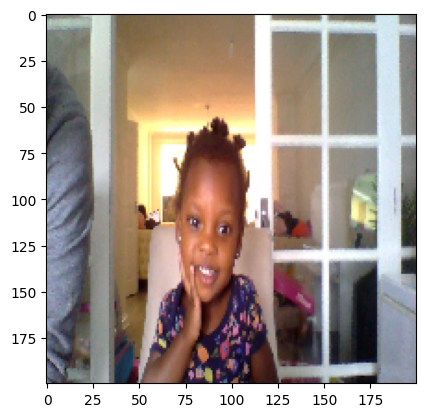

1/1 [==============================] - 0s 185ms/step
i am happy


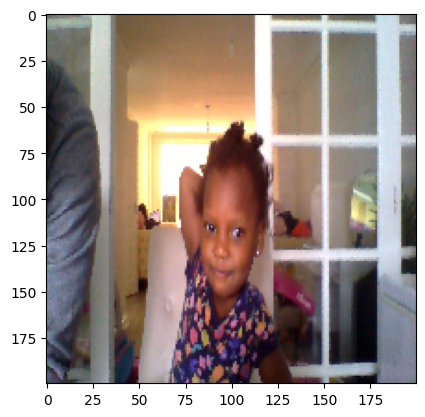

1/1 [==============================] - 0s 35ms/step
i am happy


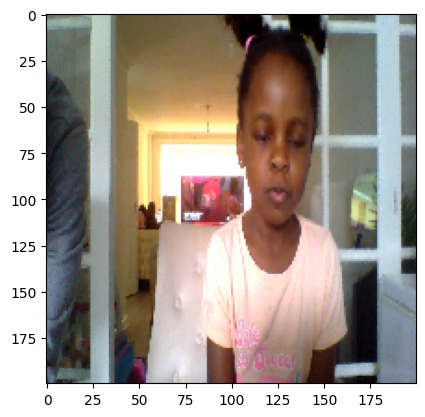

1/1 [==============================] - 0s 37ms/step
i am not happy


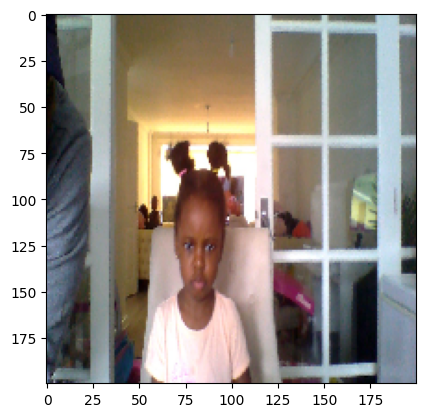

1/1 [==============================] - 0s 35ms/step
i am not happy


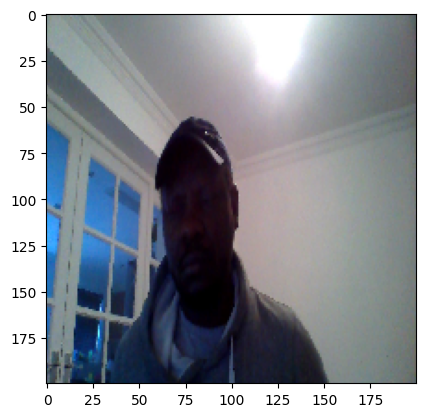

1/1 [==============================] - 0s 44ms/step
i am not happy


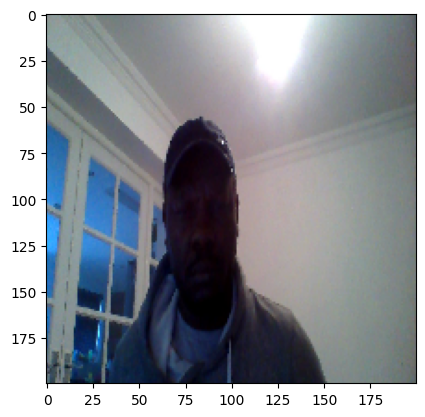

1/1 [==============================] - 0s 35ms/step
i am not happy


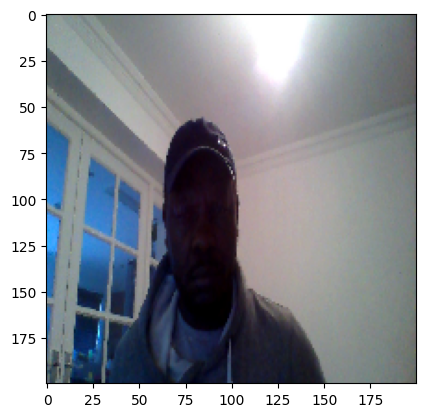

1/1 [==============================] - 0s 47ms/step
i am not happy


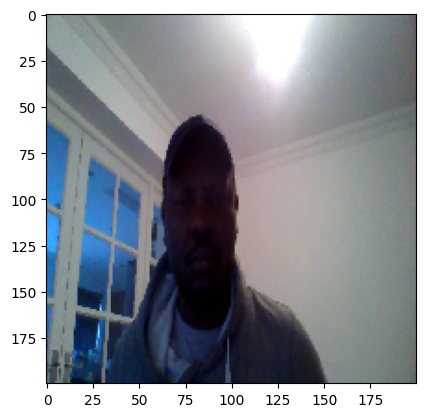

1/1 [==============================] - 0s 37ms/step
i am not happy


In [20]:
dir_path = '/content/drive/MyDrive/projectlive/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( 'i am happy')
    else:
        print('i am not happy')

In [23]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
